# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

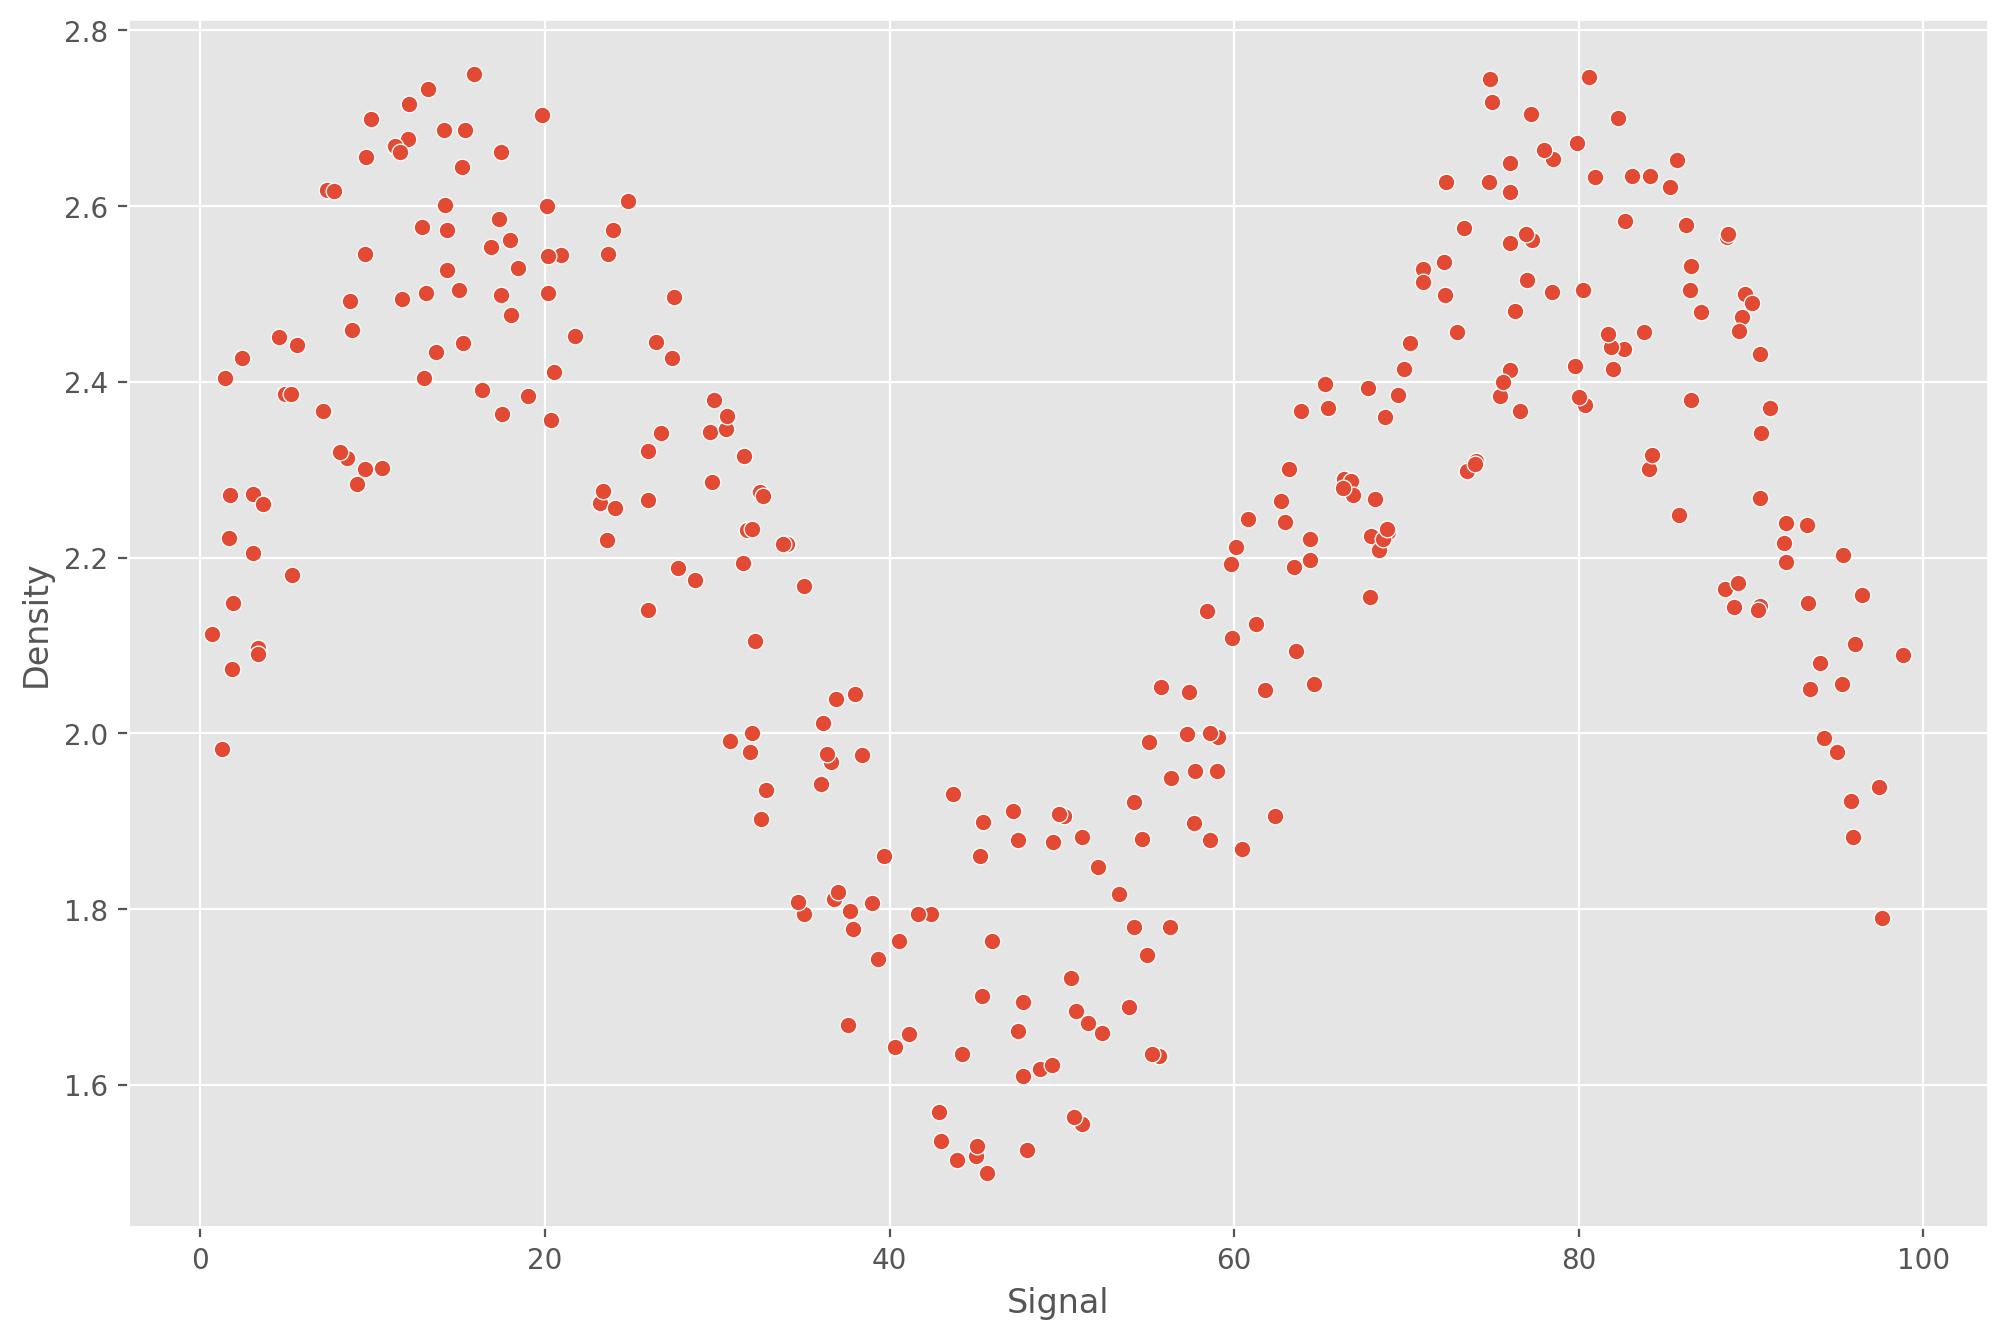

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [6]:
X = df['Signal']
X.shape

(300,)

In [50]:
X = df['Signal']. values.reshape(-1,1)
y = df['Density']


In [51]:
X.shape

(300, 1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

What does the fit look like?

In [18]:
signal_range = np.arange(0,100)

In [19]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

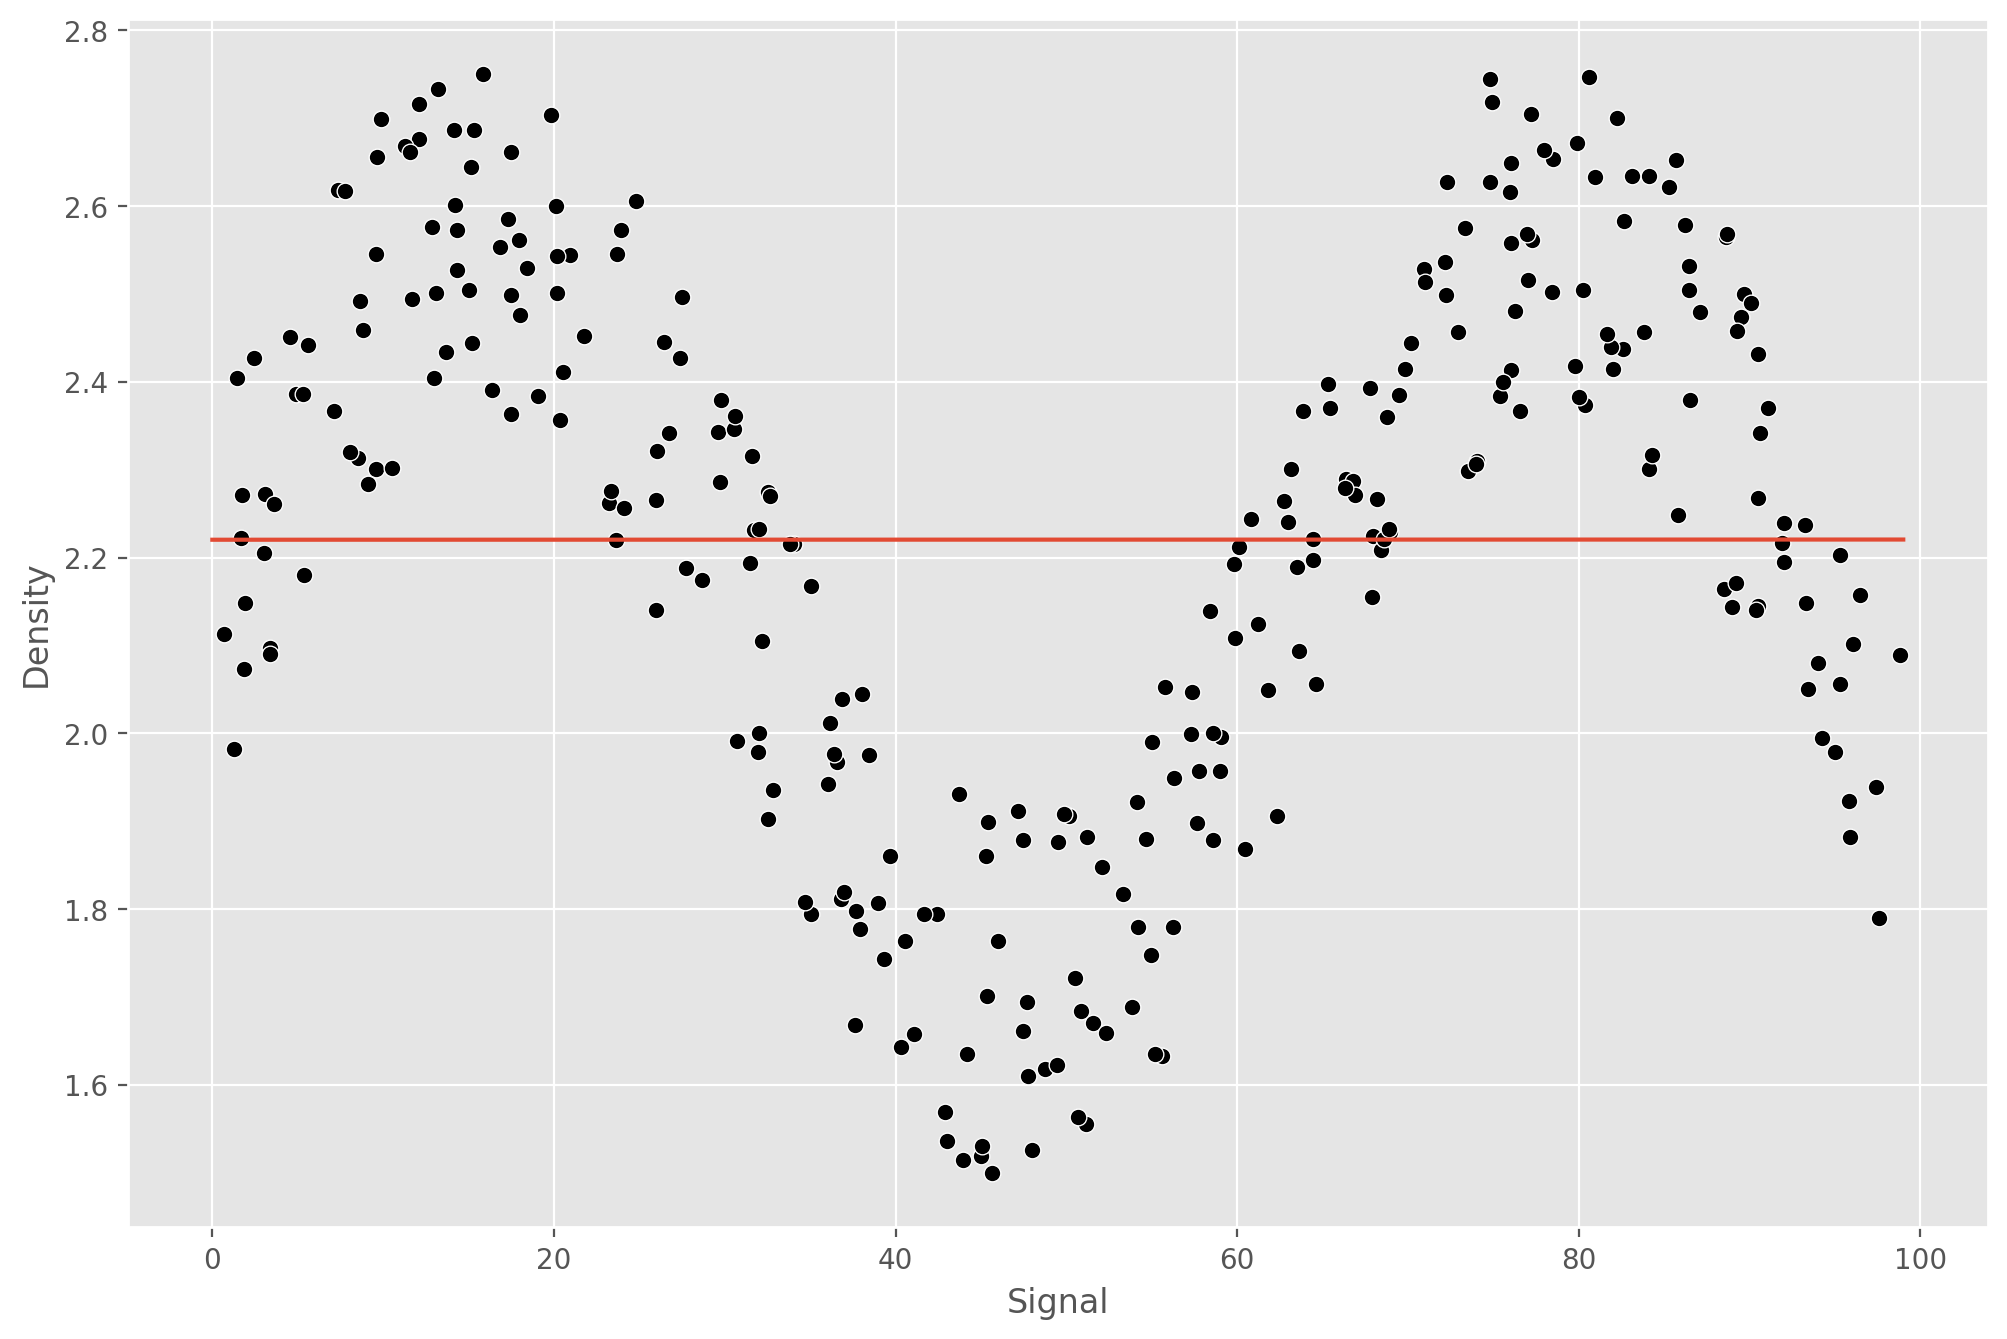

In [20]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


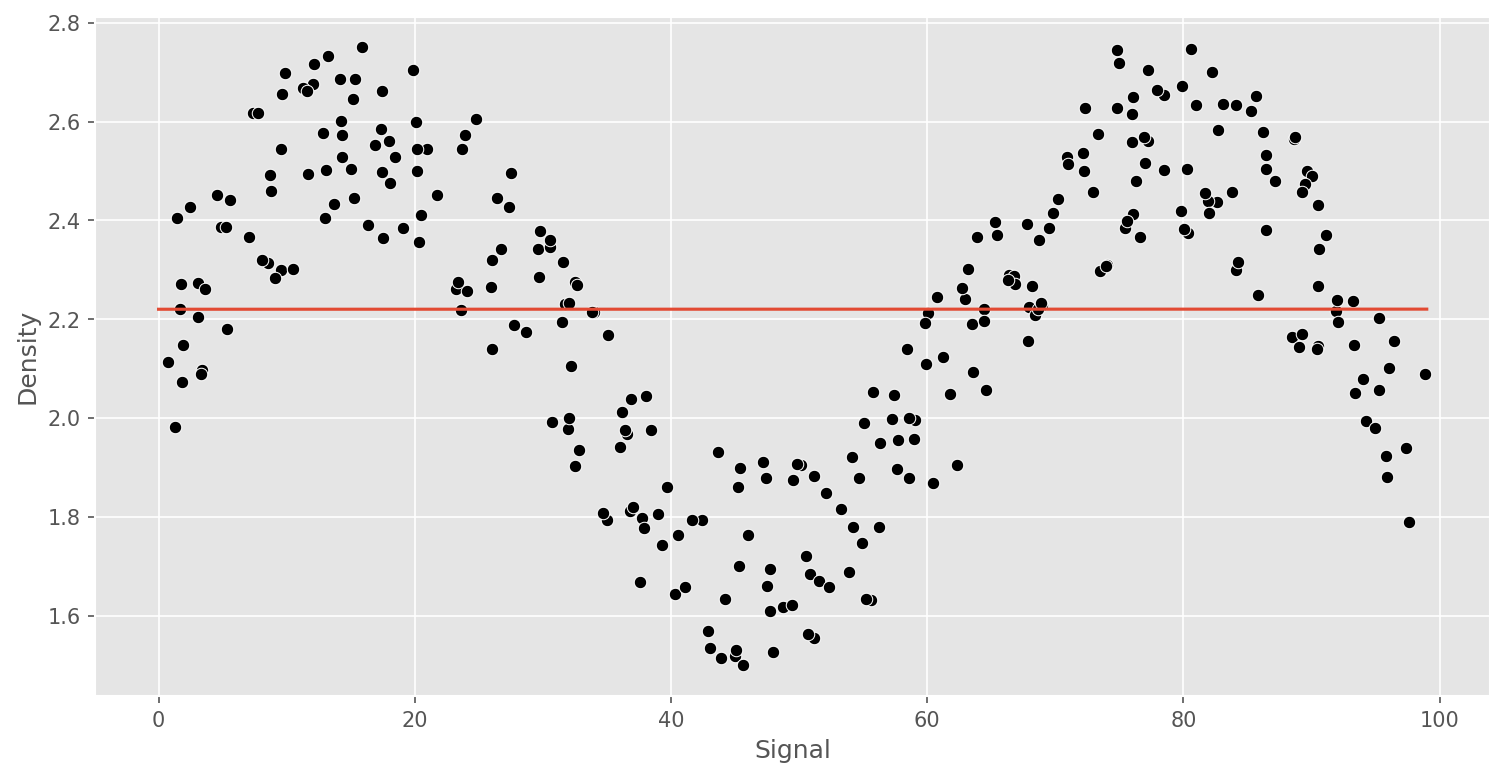

In [23]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [24]:
from sklearn.pipeline import make_pipeline

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pipe = make_pipeline(PolynomialFeatures(5),LinearRegression())

RMSE : 0.14452813084167443


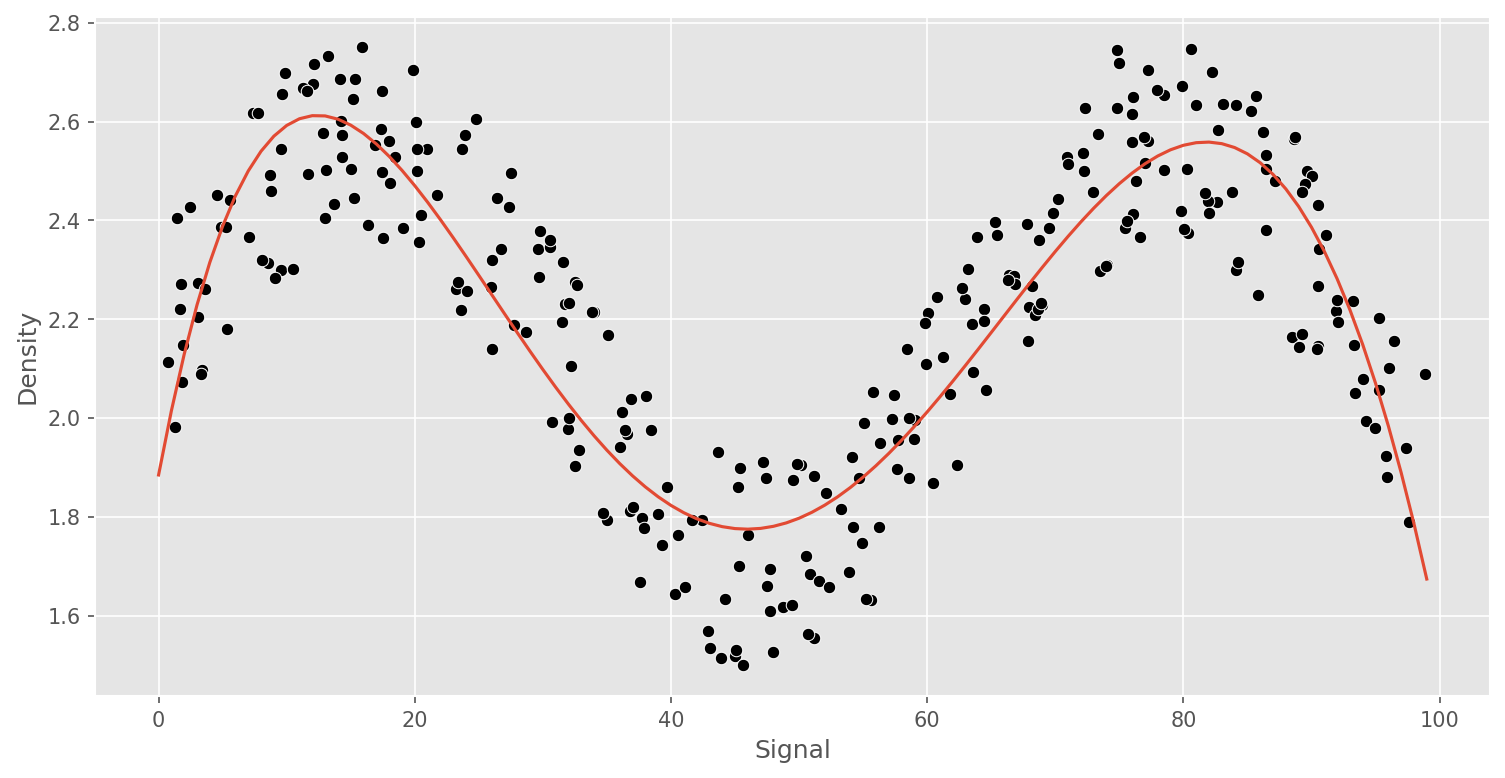

In [27]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.13807520077543758


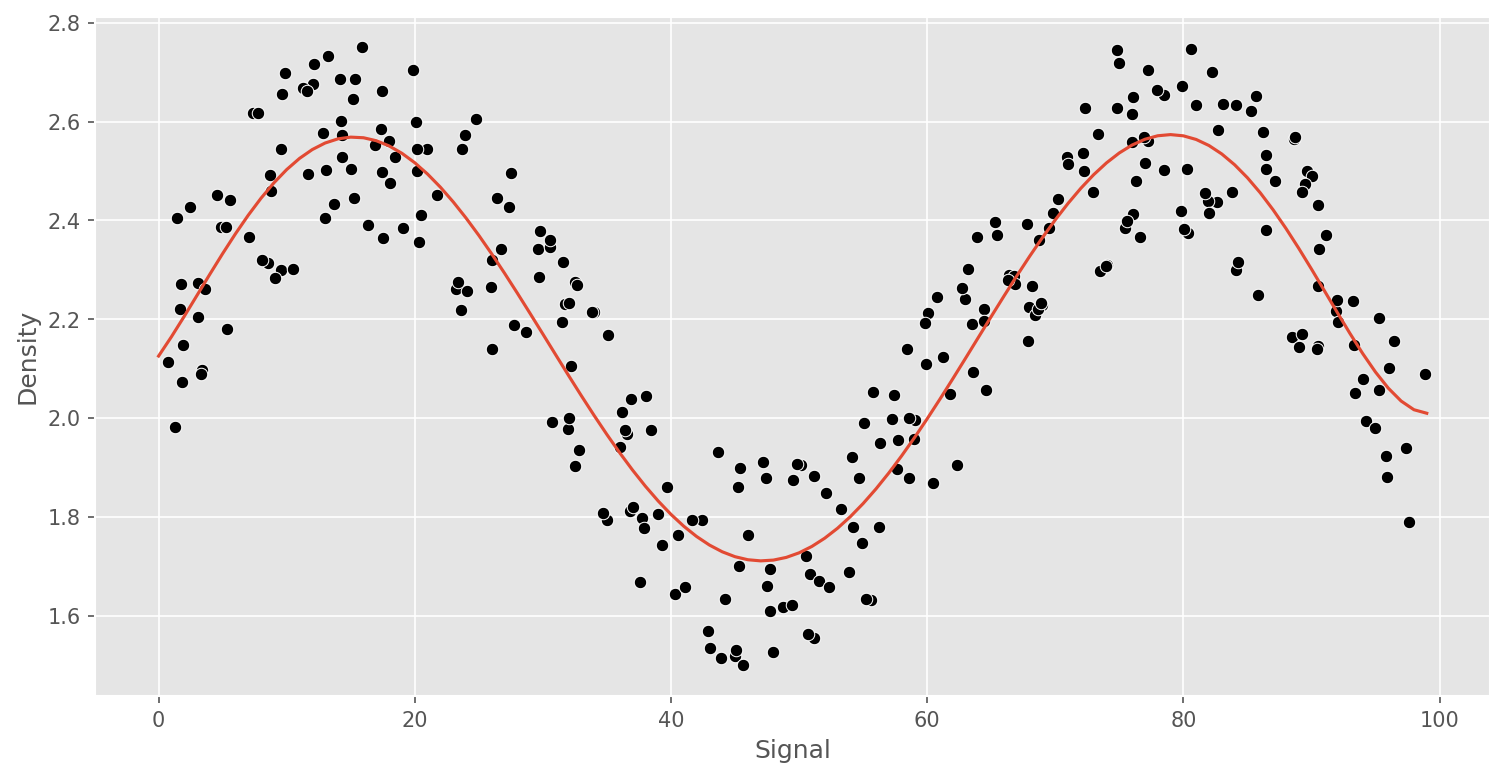

In [28]:
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926
RMSE : 0.13351482702752904
RMSE : 0.1397499127378895
RMSE : 0.151321497164368
RMSE : 0.15954234753677107


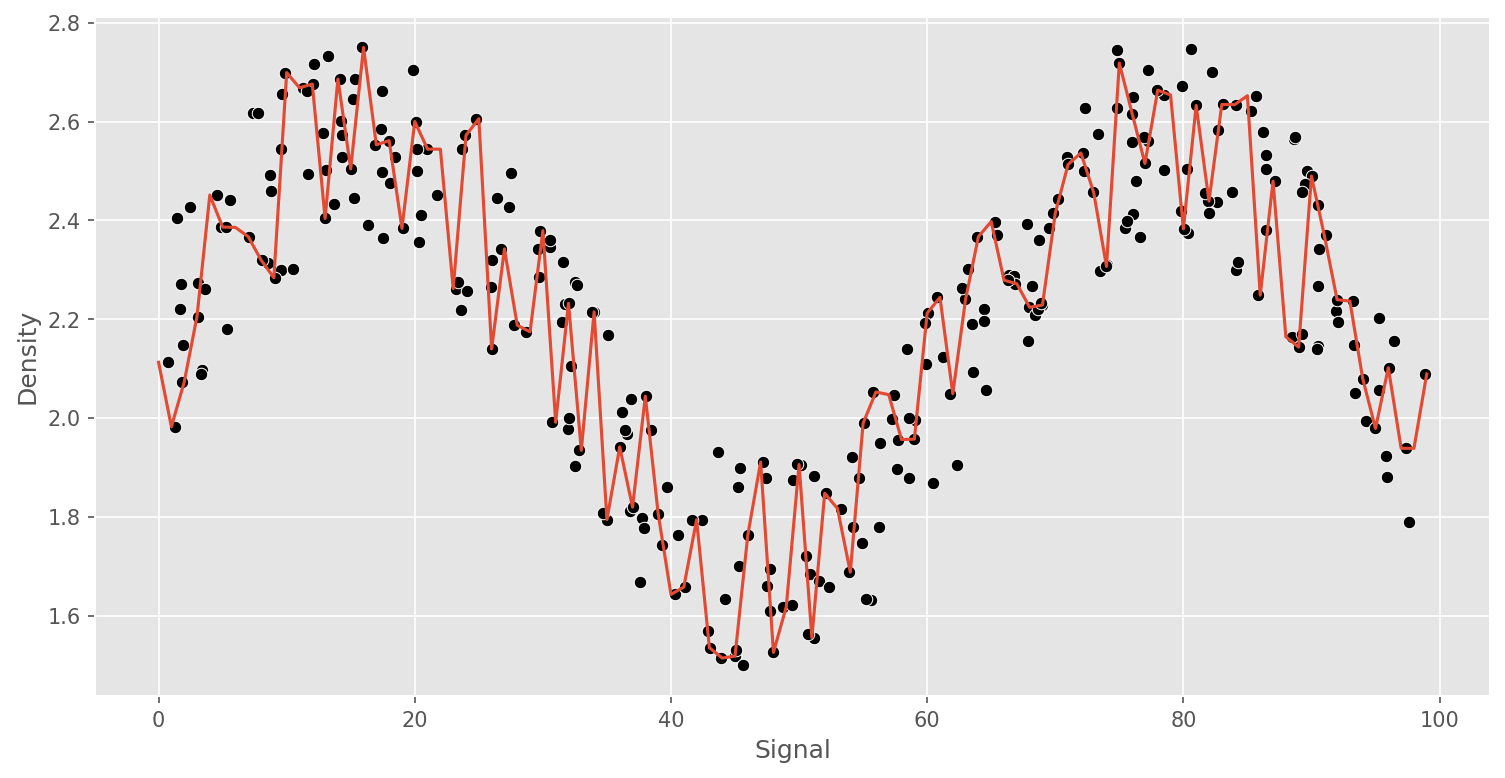

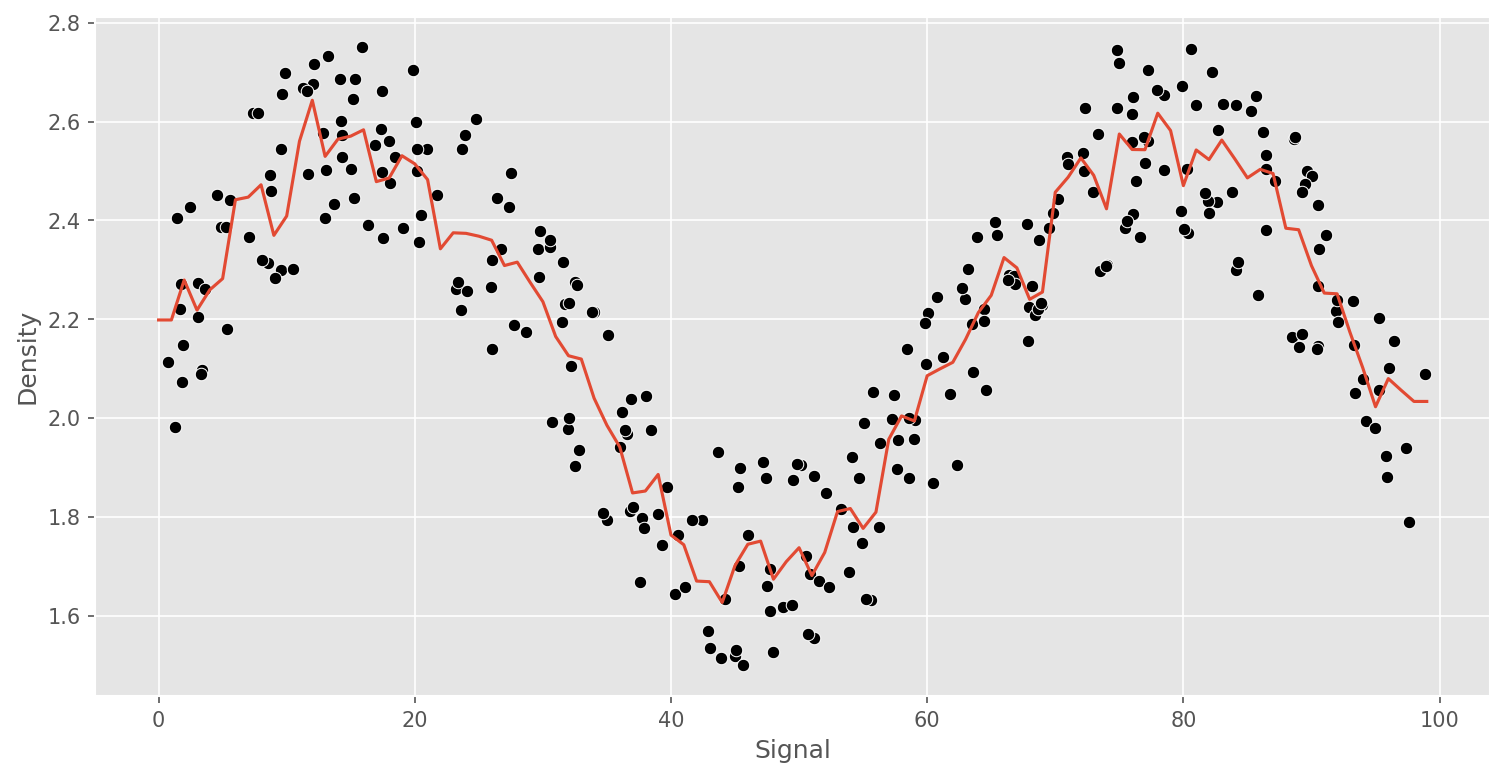

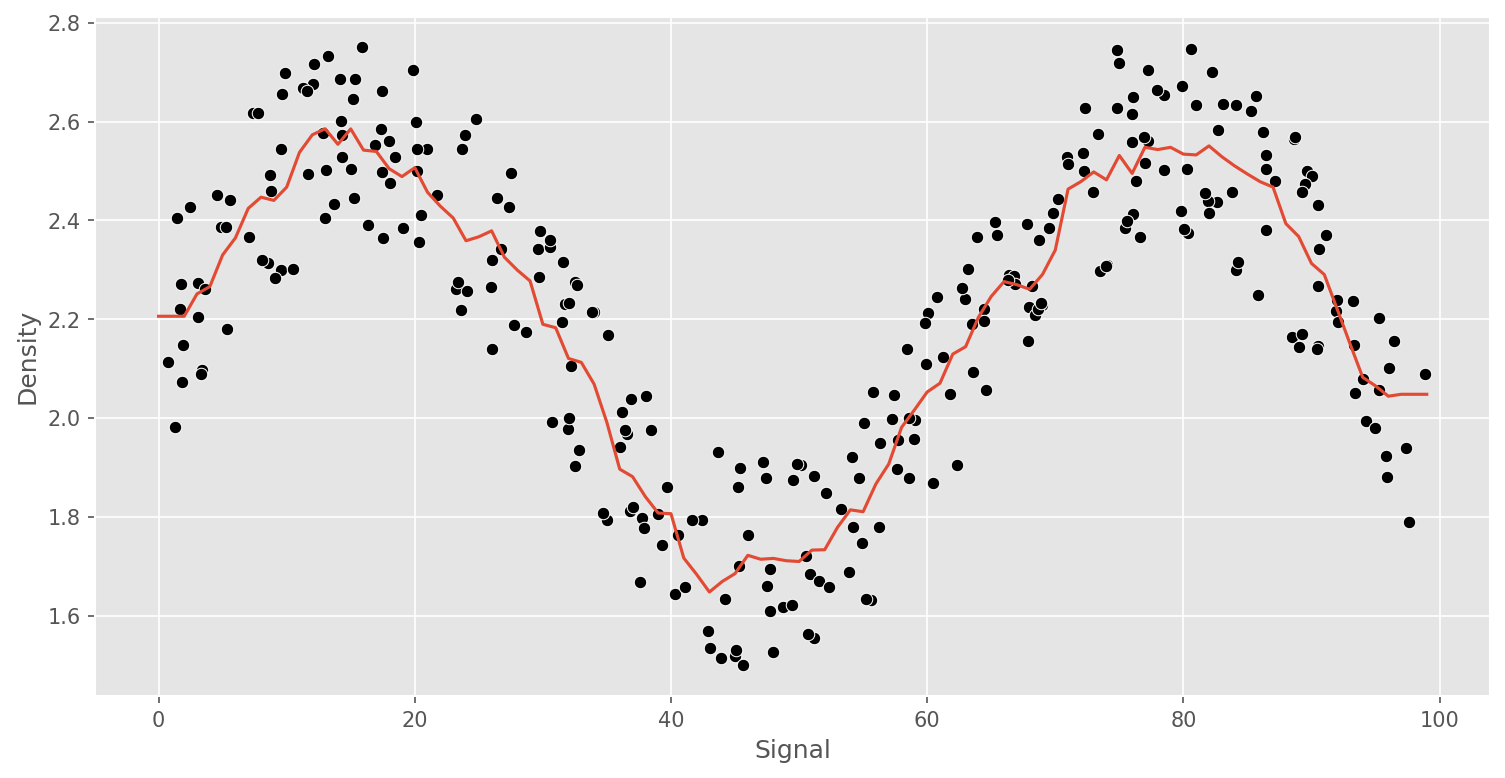

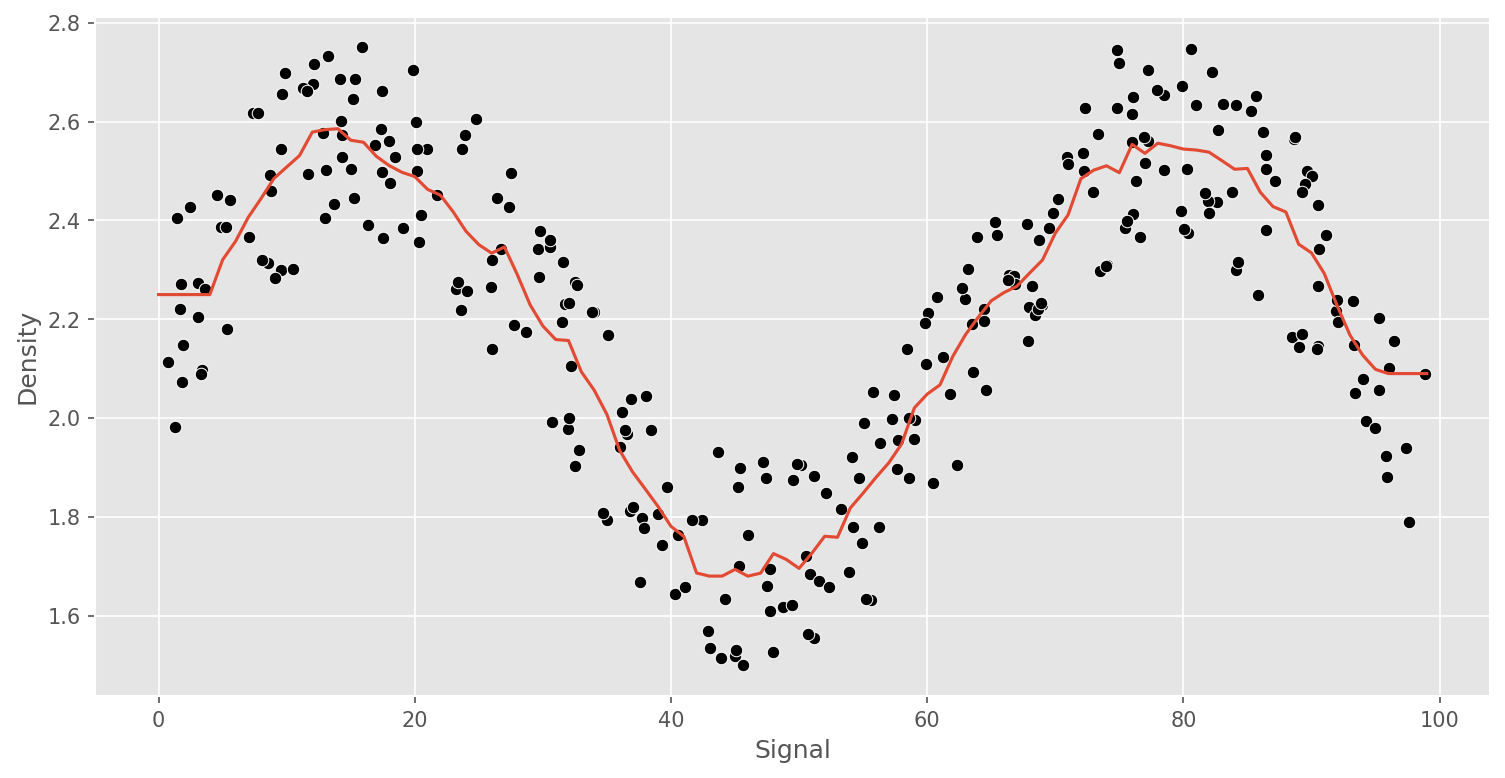

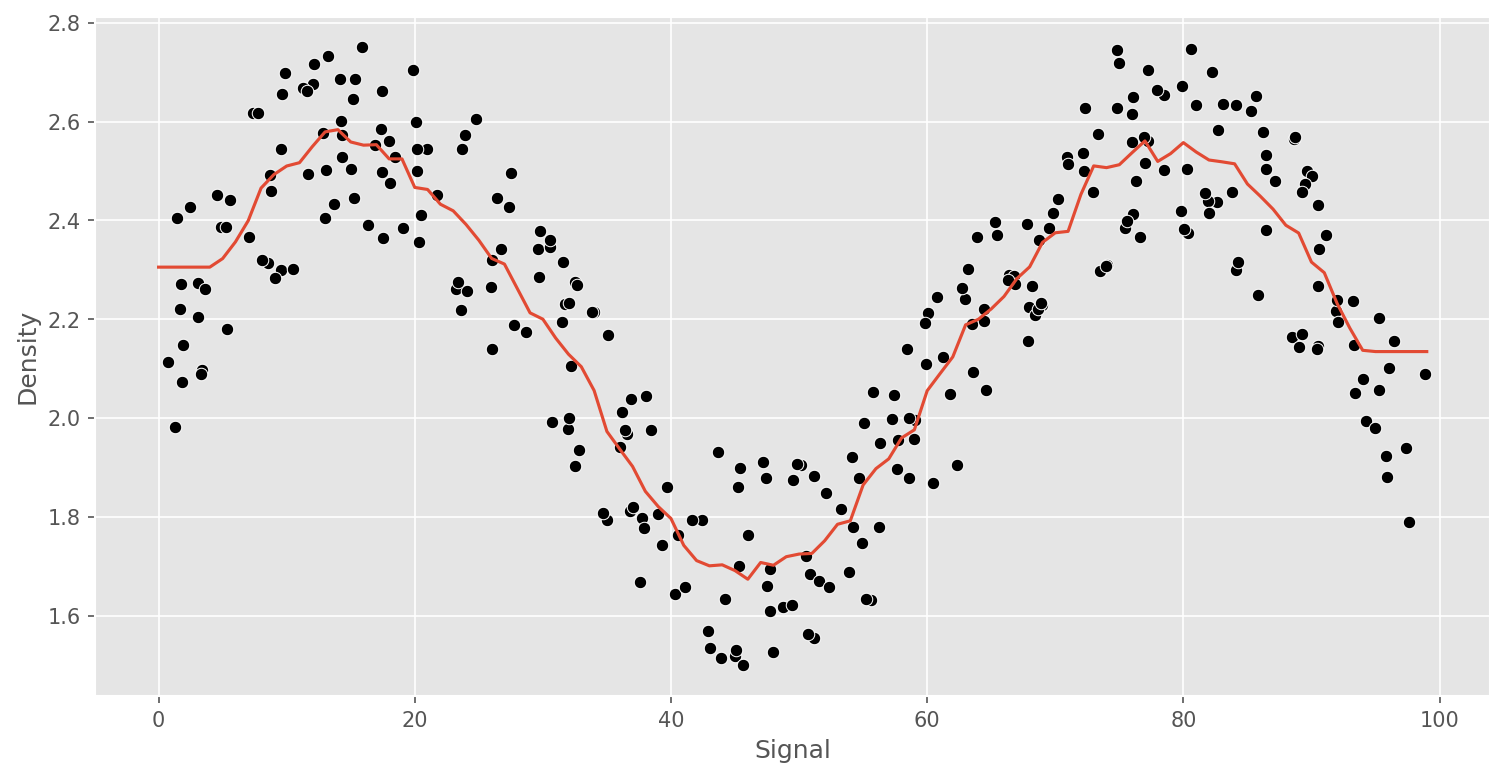

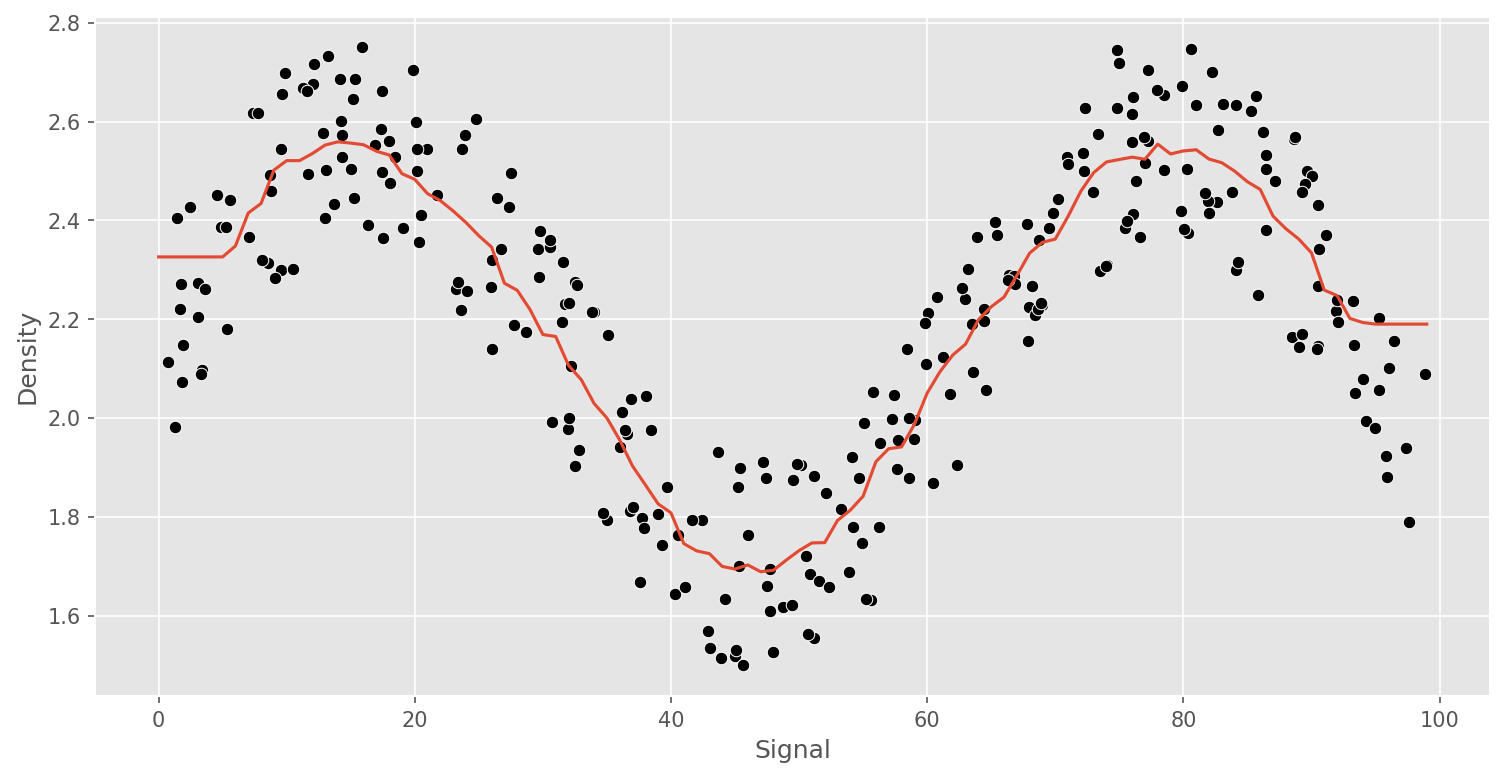

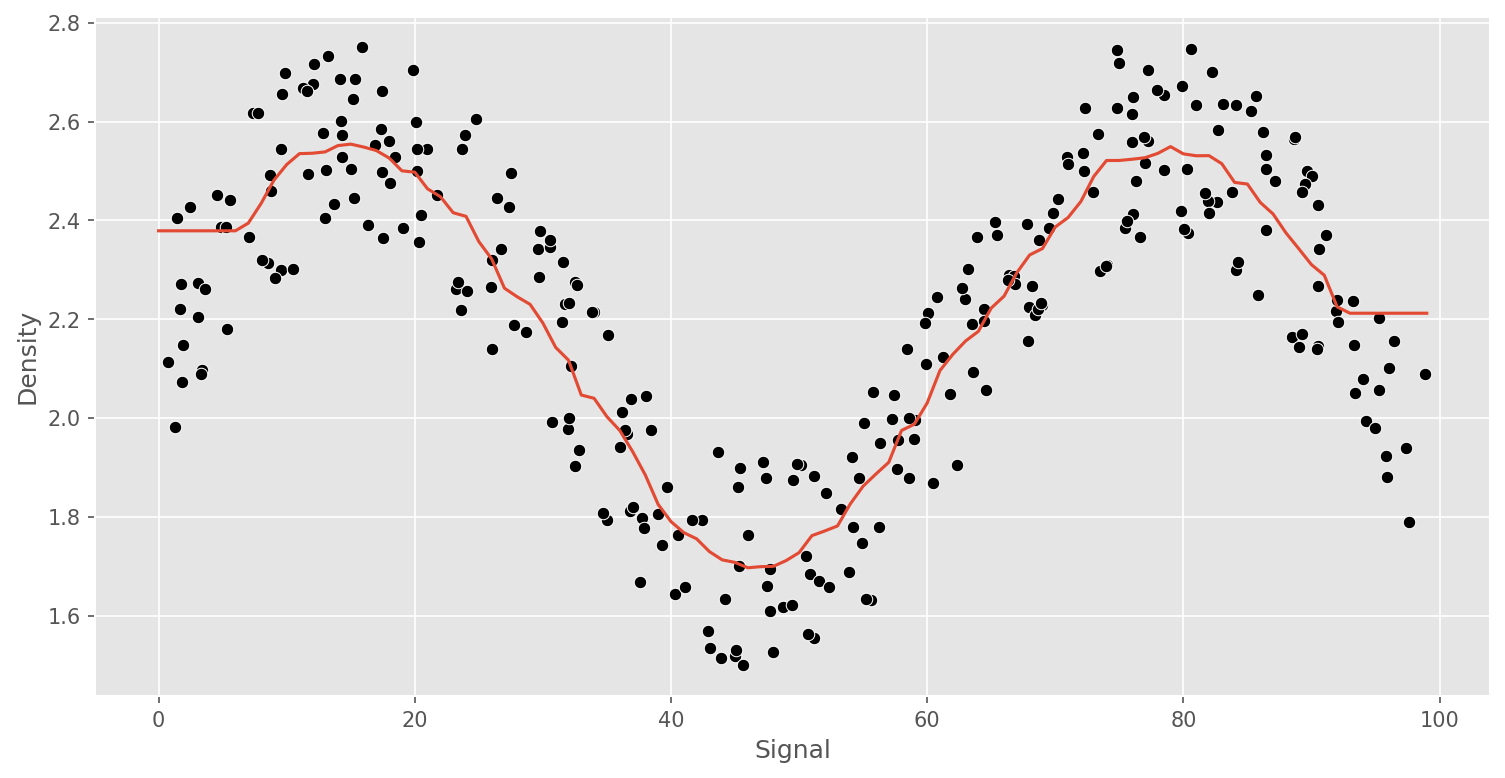

In [30]:
preds = {}
k_values = [1,5,10,15,20,25,30]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


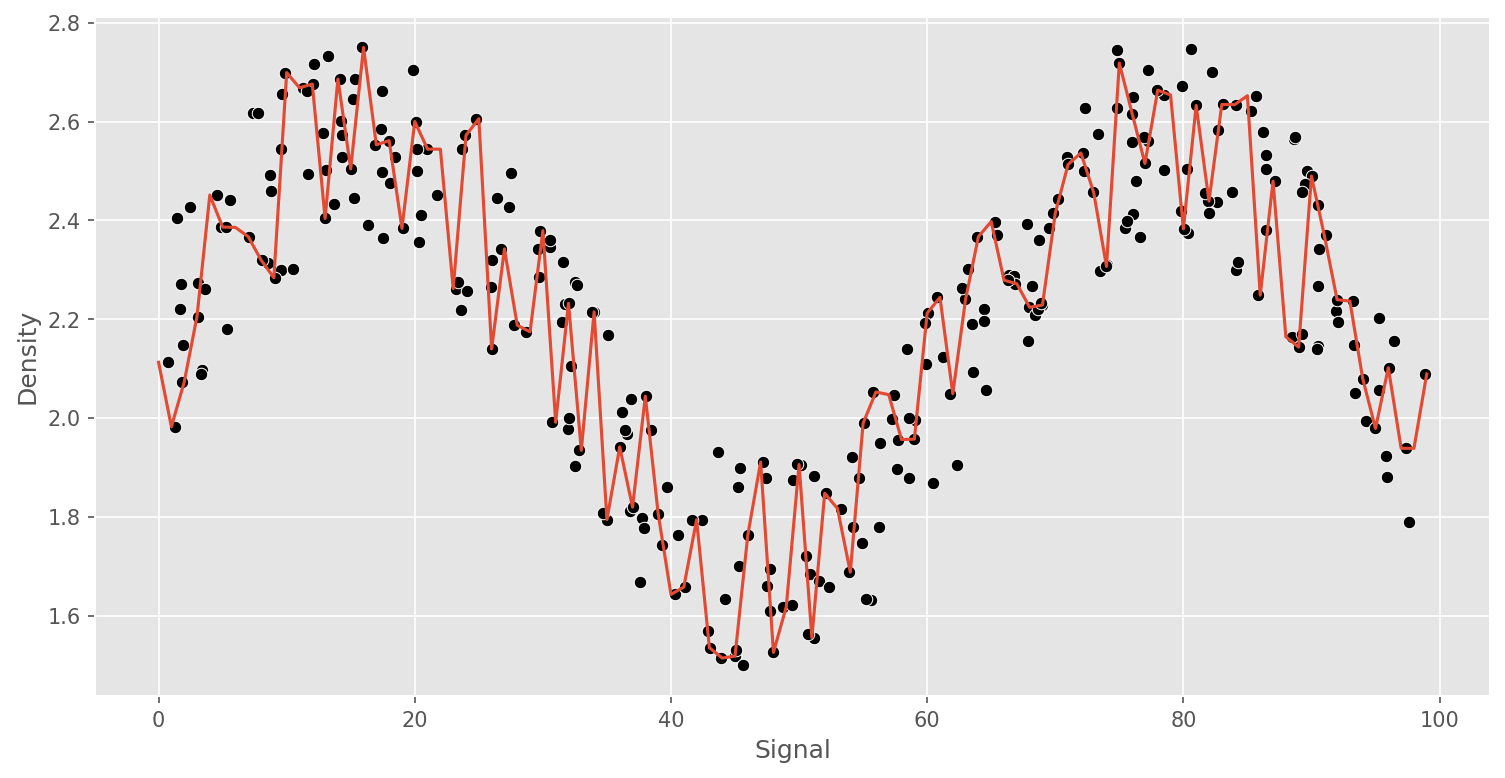

In [32]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [33]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [34]:
from sklearn.svm import SVR

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C':[1,5,10,100,1000,1500,2000],'gamma':['auto','scale']}
svr = SVR()

In [37]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12642044545515724


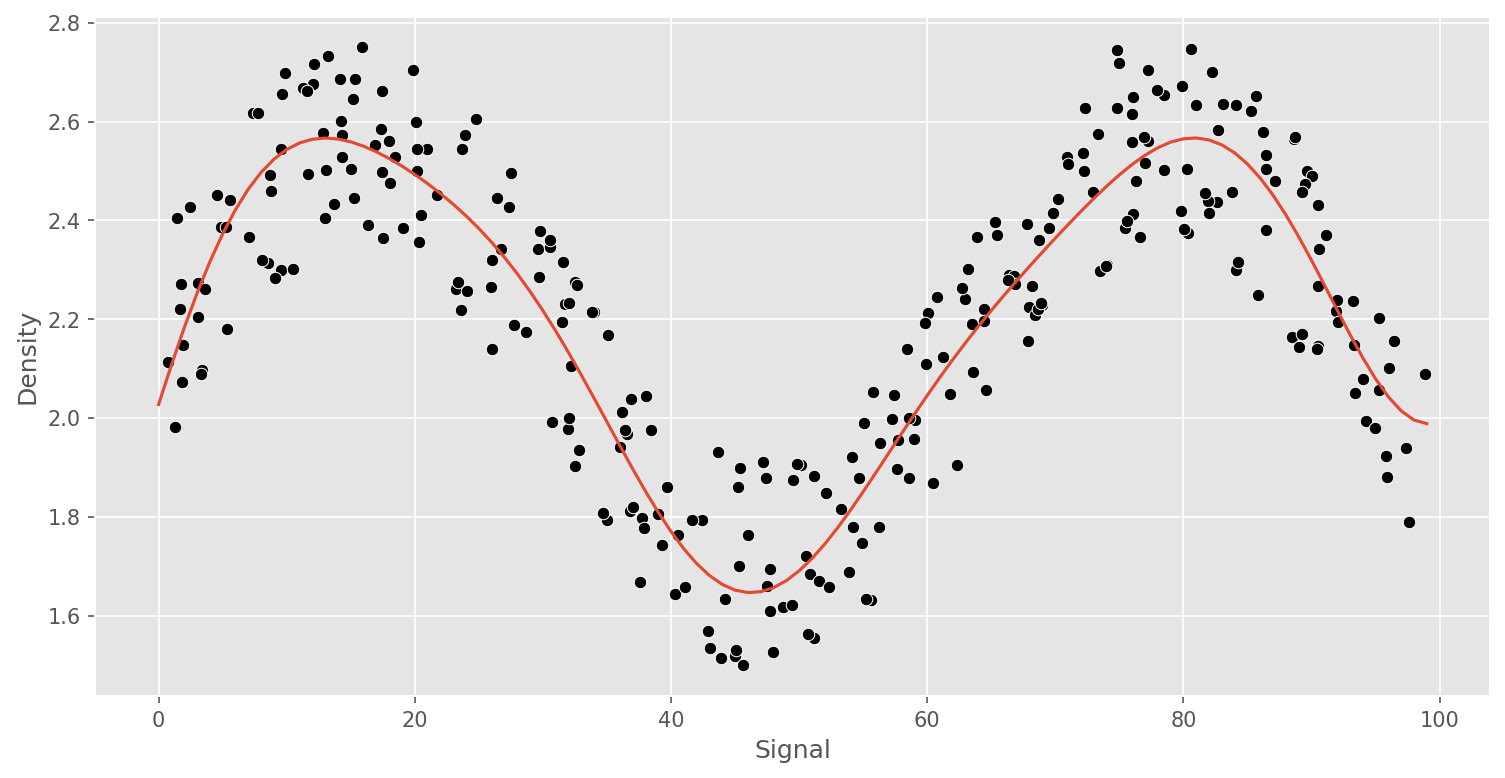

In [38]:
run_model(grid,X_train,y_train,X_test,y_test)

In [39]:
grid.best_estimator_

SVR(C=1500)

---

## Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# help(RandomForestRegressor)

RMSE : 0.12295362707952848
RMSE : 0.13648584119251025
RMSE : 0.13114470132021094


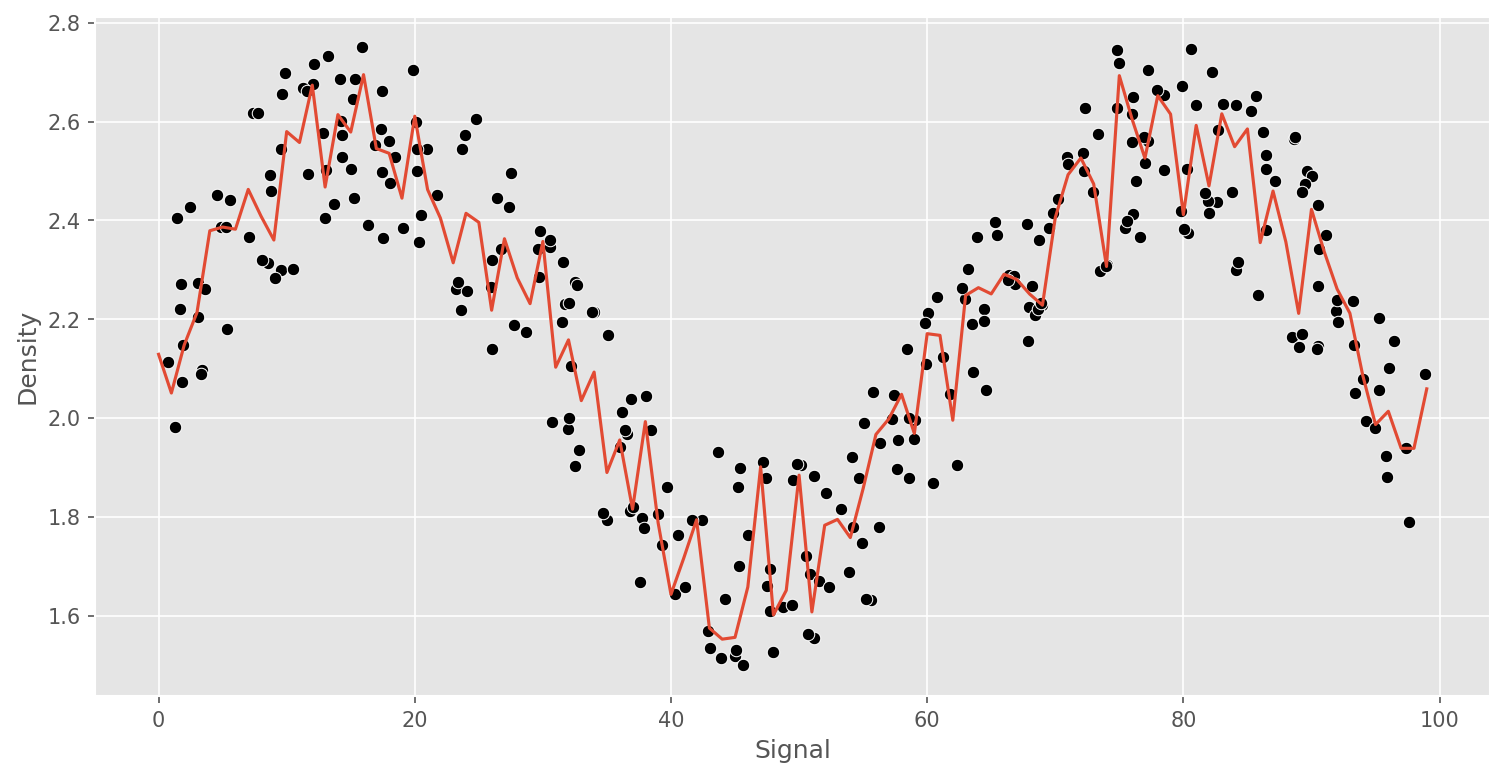

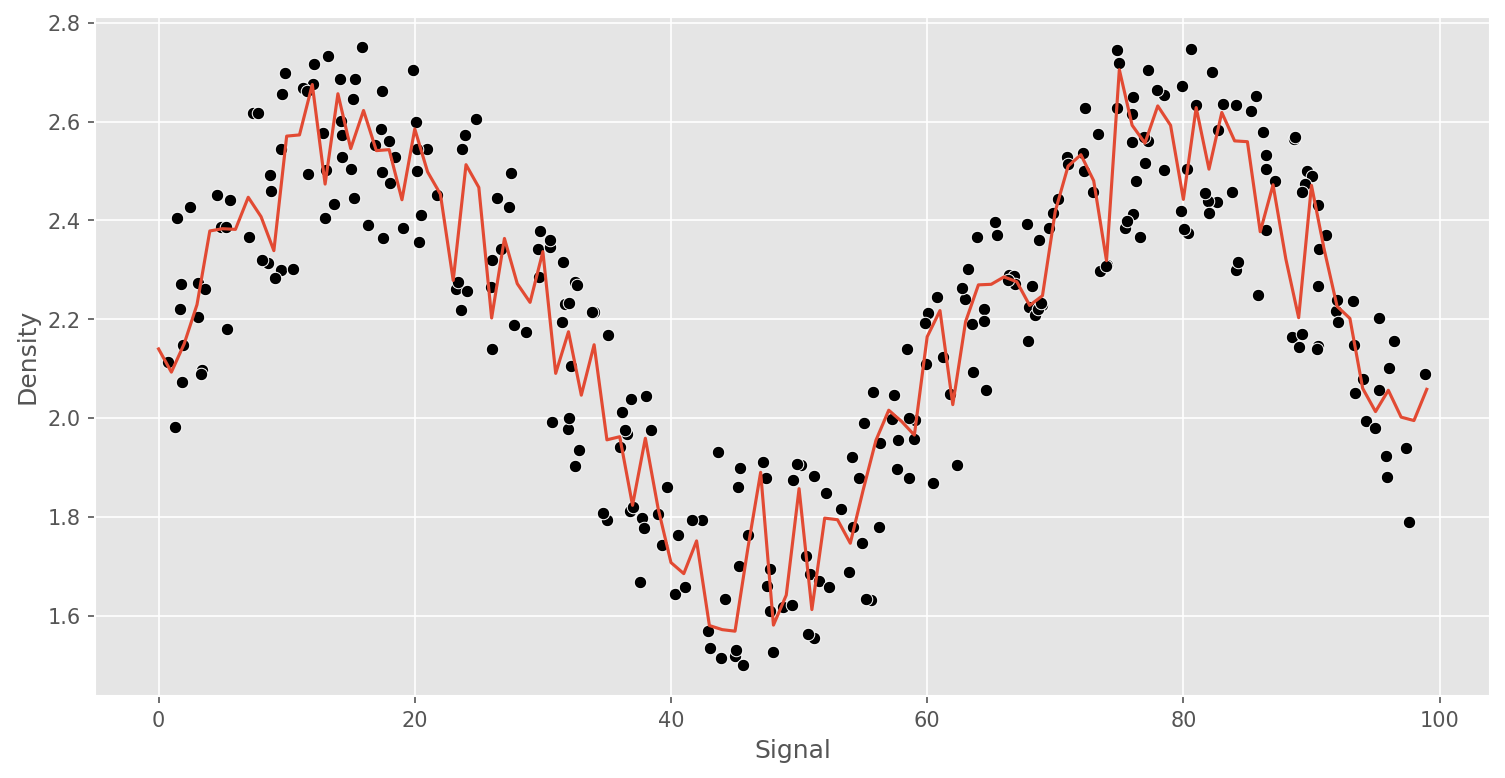

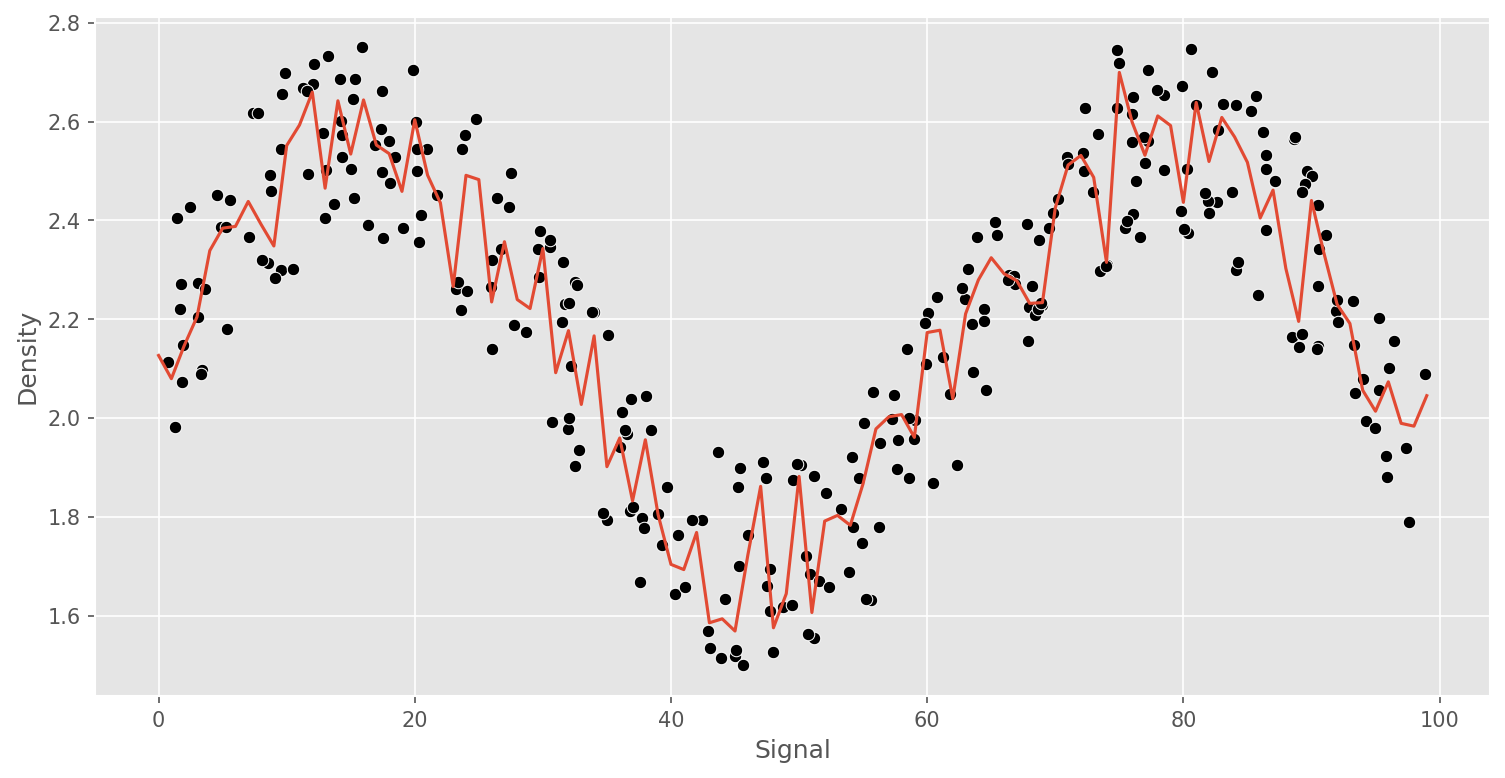

In [42]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


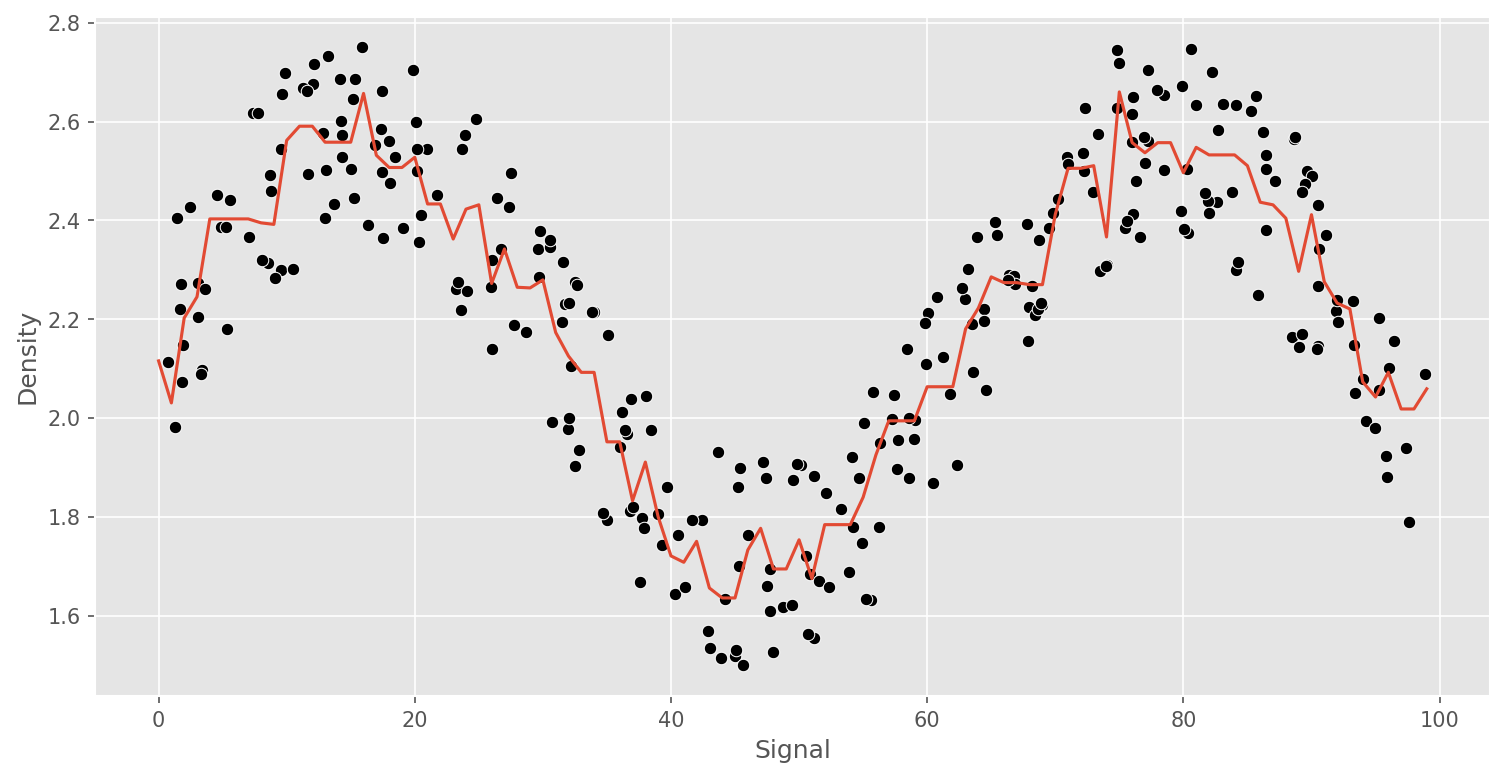

In [45]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [46]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


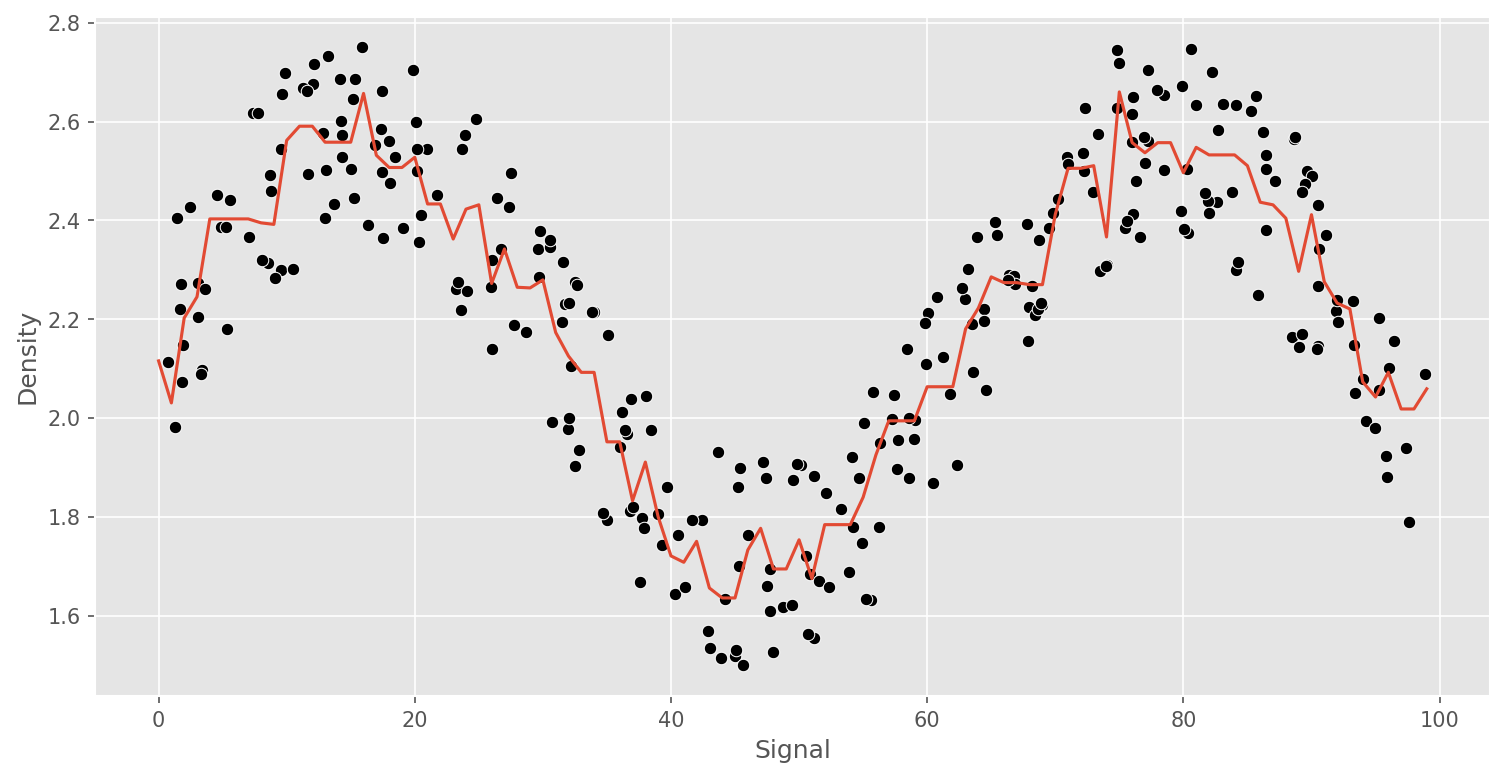

In [47]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----